In [ ]:
!pip install pyodbc

In [14]:
import sqlalchemy
from sqlalchemy import create_engine
import pyodbc
SERVER = '5.172.64.20\sqlexpress'
DATABASE = 'zhao.filippo'
USERNAME = 'zhao.filippo'
PASSWORD = 'xxx123##'
connectionString = f'DRIVER={{SQL Server}};SERVER={SERVER};DATABASE={DATABASE};UID={USERNAME};PWD={PASSWORD}'
conn = pyodbc.connect(connectionString)

In [15]:
conn

mostrare con un grafico a barre verticali il numero di prodotti per ogni categoria

In [16]:
sql_query = """
SELECT production.categories.category_name, COUNT(production.products.product_id) as numeroProdotti
FROM production.products
inner join production.categories on categories.category_id = products.category_id
group by production.categories.category_name
order by numeroProdotti DESC
"""

In [17]:
from sqlalchemy.engine import URL
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connectionString})
engine = create_engine(connection_url)
connAlch = engine.connect()
df = pd.read_sql(sql_query, connAlch)

In [18]:
df

,category_name,numeroProdotti
0,Cruisers Bicycles,78
1,Mountain Bikes,60
2,Road Bikes,60
3,Children Bicycles,59
4,Comfort Bicycles,30
5,Electric Bikes,24
6,Cyclocross Bicycles,10


In [20]:
import matplotlib.pyplot as plt

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Cruisers Bicycles'),
  Text(1, 0, 'Mountain Bikes'),
  Text(2, 0, 'Road Bikes'),
  Text(3, 0, 'Children Bicycles'),
  Text(4, 0, 'Comfort Bicycles'),
  Text(5, 0, 'Electric Bikes'),
  Text(6, 0, 'Cyclocross Bicycles')])

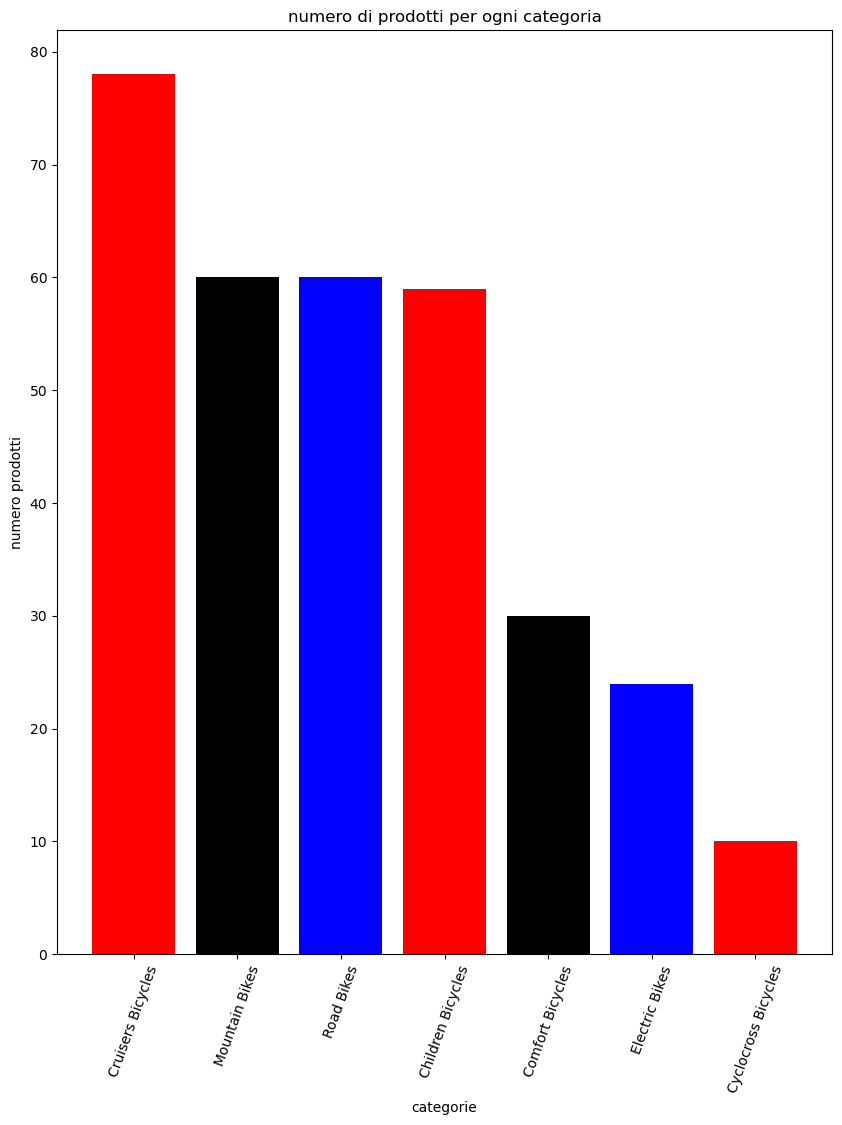

In [23]:
stringhe = df.category_name
dati = df.numeroProdotti
fig, ax = plt.subplots(figsize = (10, 12))
ax.bar(stringhe, dati, color = ['red', 'black', 'blue'])
ax.set_title('numero di prodotti per ogni categoria')
ax.set_xlabel('categorie')
ax.set_ylabel('numero prodotti')
plt.xticks(rotation = 70)

mostrare con un grafico a torta con valori assoluti, l'ammontare totale dei prodotti di ogni categoria

In [25]:
sql_query2 = """
SELECT production.categories.category_name, sum(sales.order_items.list_price * (1 - sales.order_items.discount) * sales.order_items.quantity) as ammontareTotale
FROM production.products
inner join production.categories on categories.category_id = products.category_id
inner join sales.order_items on order_items.product_id = production.products.product_id
group by production.categories.category_name
order by ammontareTotale DESC
"""

In [26]:
from sqlalchemy.engine import URL
connection_url = URL.create("mssql+pyodbc", query={"odbc_connect": connectionString})
engine = create_engine(connection_url)
connAlch = engine.connect()
df2 = pd.read_sql(sql_query2, connAlch)

In [27]:
df2

,category_name,ammontareTotale
0,Mountain Bikes,2.715080e+06
1,Road Bikes,1.665098e+06
2,Cruisers Bicycles,9.950326e+05
3,Electric Bikes,9.166848e+05
4,Cyclocross Bicycles,7.110118e+05
5,Comfort Bicycles,3.940201e+05
6,Children Bicycles,2.921892e+05


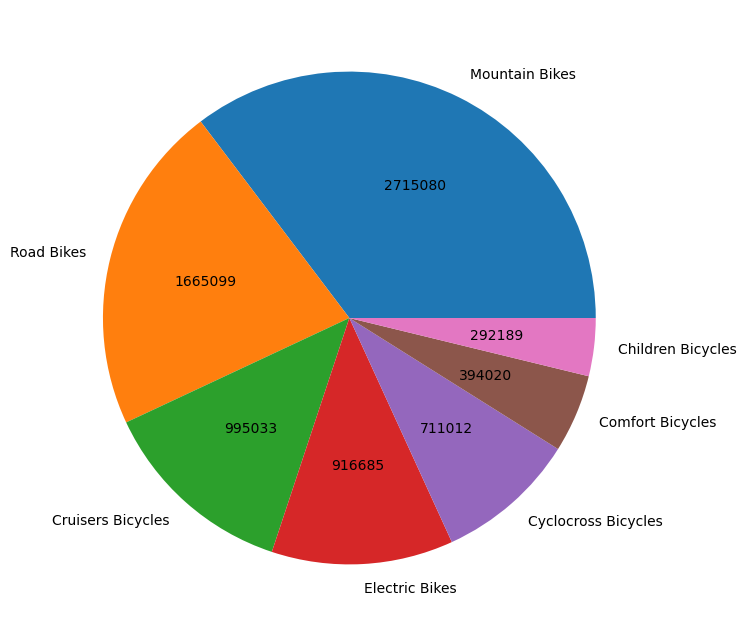

In [28]:
stringhe2 = df2.category_name
dati2 = df2.ammontareTotale
plt.figure(figsize=(16, 8))
plt.pie(dati2, labels=stringhe2, autopct=lambda p:  '{:.0f}'.format(p * (dati2.sum()) / 100))
plt.show()